## 파이썬 딥러닝 머신러닝 입문
[출처](http://www.yes24.com/Product/Goods/96087004)
<br/>


[데이터 출처](https://dacon.io/competitions/open/235610/data)
<br/>

DATA DESCRIPTION

|Category|Descript|
|---|---|
|index|구분자|
|quality|품질|
|fixed acidity|산도|
|volatile acidity|휘발성산|
|citric acid|시트르산|
|residual sugar|발효 후 와인 속에 남아있는 당분(잔당)|
|chlorides|염화물|
|free sulfur dioxide|독립 이산화황|
|total sulfur dioxide|총 이산화황|
|density|밀도|
|pH|수소이온농도|
|sulphates|황산염|
|alcohol|도수|
|type|와인 종류|

In [180]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [181]:
# predict quality of wine
df_train = pd.read_csv('../data/wine/train.csv')
df_test = pd.read_csv('../data/wine/test.csv')

df_train['split'] = 'train'
df_test['split'] = 'test'

print(df_train.shape,df_test.shape)

(5497, 15) (1000, 14)


In [182]:
df = pd.concat([df_train,df_test],axis=0,ignore_index=True)
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,split
0,0,5.0,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,train
1,1,5.0,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,train
2,2,5.0,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,train
3,3,6.0,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,train
4,4,6.0,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,NaN,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,test
6493,996,NaN,8.7,0.150,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,test
6494,997,NaN,8.8,0.660,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,test
6495,998,NaN,7.0,0.420,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red,test


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   quality               5497 non-null   float64
 2   fixed acidity         6497 non-null   float64
 3   volatile acidity      6497 non-null   float64
 4   citric acid           6497 non-null   float64
 5   residual sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  type                  6497 non-null   object 
 14  split                 6497 non-null   object 
dtypes: float64(12), int64

In [184]:
df.isna().sum()

index                      0
quality                 1000
fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
type                       0
split                      0
dtype: int64

In [185]:
df.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,split
0,0,5.0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,train
1,1,5.0,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,train
2,2,5.0,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,train
3,3,6.0,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,train
4,4,6.0,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,train


In [186]:
df.tail()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,split
6492,995,NaN,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,test
6493,996,NaN,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,test
6494,997,NaN,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,test
6495,998,NaN,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red,test
6496,999,NaN,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,white,test


In [187]:
# change color name
df.columns = df.columns.map(lambda x:'_'.join(x.split()))
df.columns

Index(['index', 'quality', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'split'],
      dtype='object')

alcohol                 0.439615
density                 0.299831
volatile_acidity        0.261557
chlorides               0.198148
citric_acid             0.079157
fixed_acidity           0.076506
free_sulfur_dioxide     0.055574
sulphates               0.042068
total_sulfur_dioxide    0.039732
residual_sugar          0.032848
pH                      0.017931
index                   0.008045
Name: quality, dtype: float64

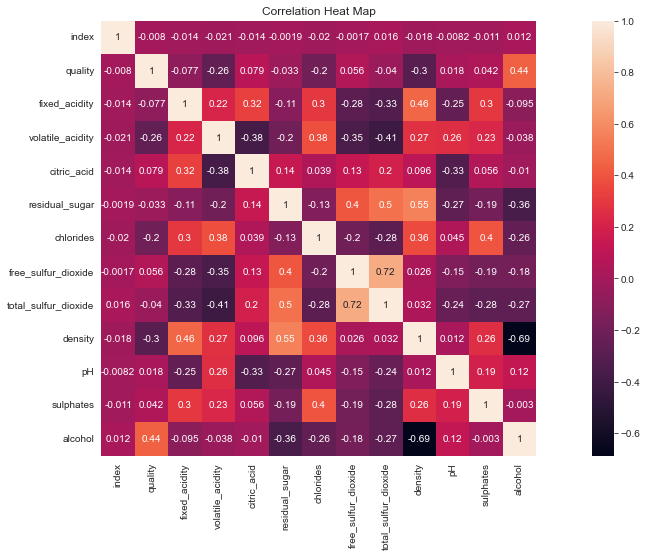

In [188]:
corr = df.corr()
corr_sorted = corr.loc[corr.columns.difference(['quality','split']),'quality'].abs().sort_values(ascending=False)

fig,ax = plt.subplots(1,1,figsize=(20,8))

sns.set_style('white')
sns.heatmap(corr,annot=True,square=True,ax=ax)
plt.title('Correlation Heat Map')

corr_sorted

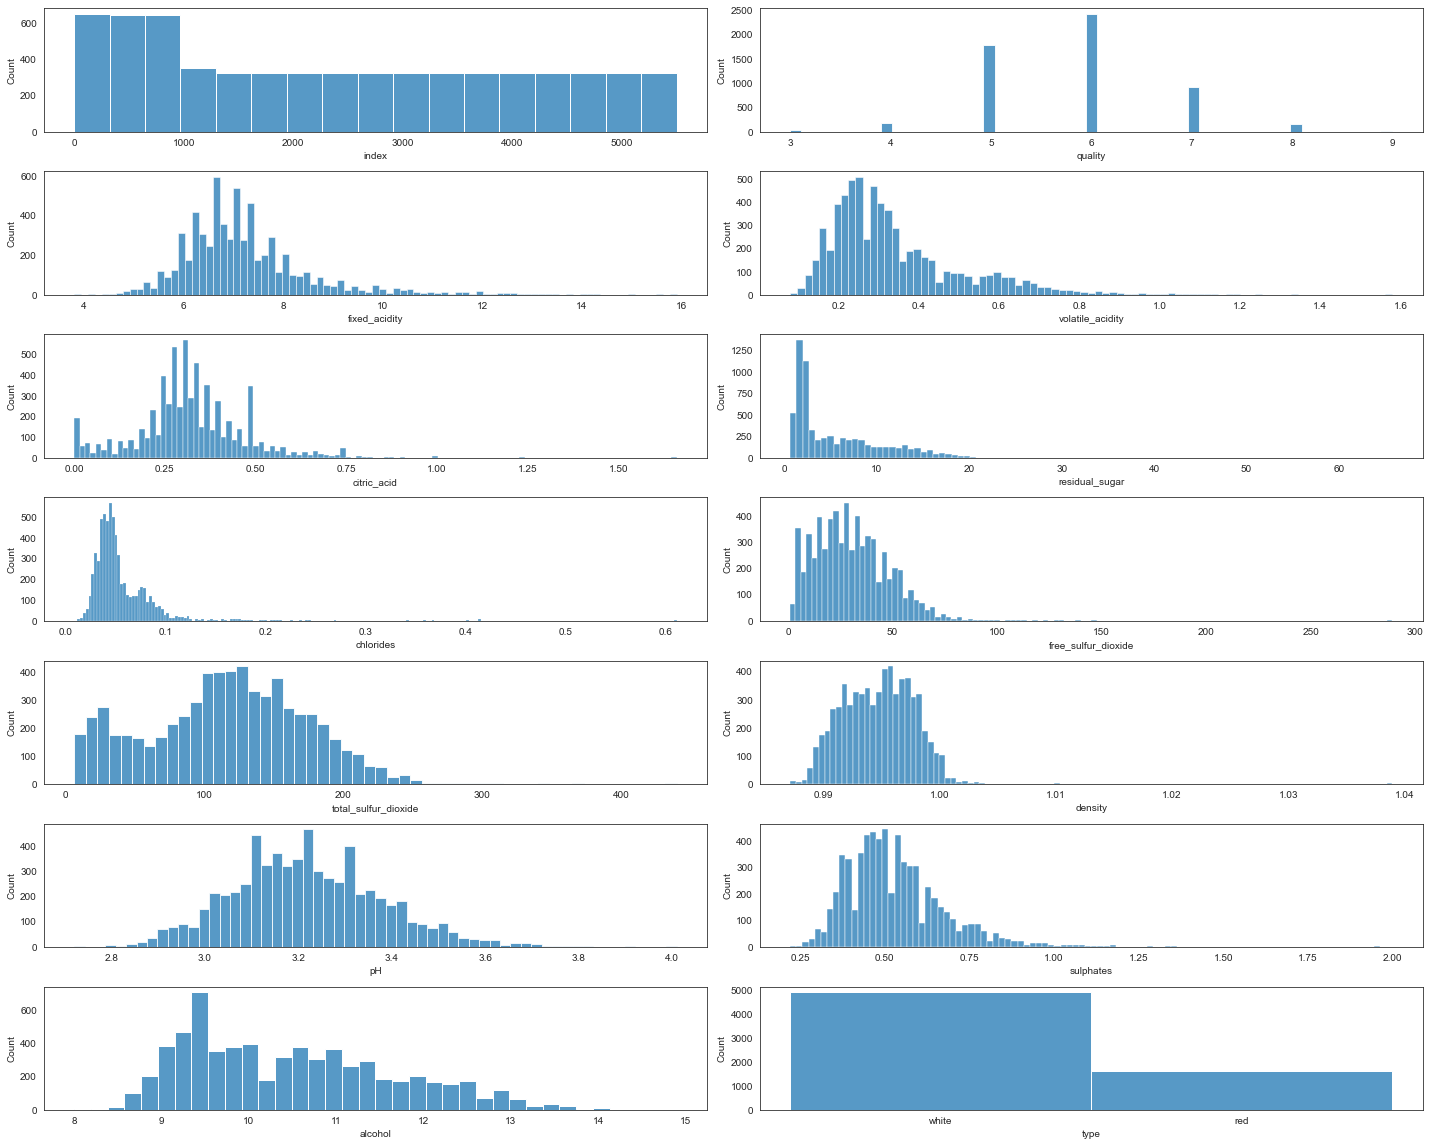

In [189]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(20,16))
axes = [*axes.reshape(1,-1)][0]

for i,c in enumerate(df.columns.drop(['split'])):
    sns.histplot(data=df,x=c,ax=axes[i])
plt.tight_layout()

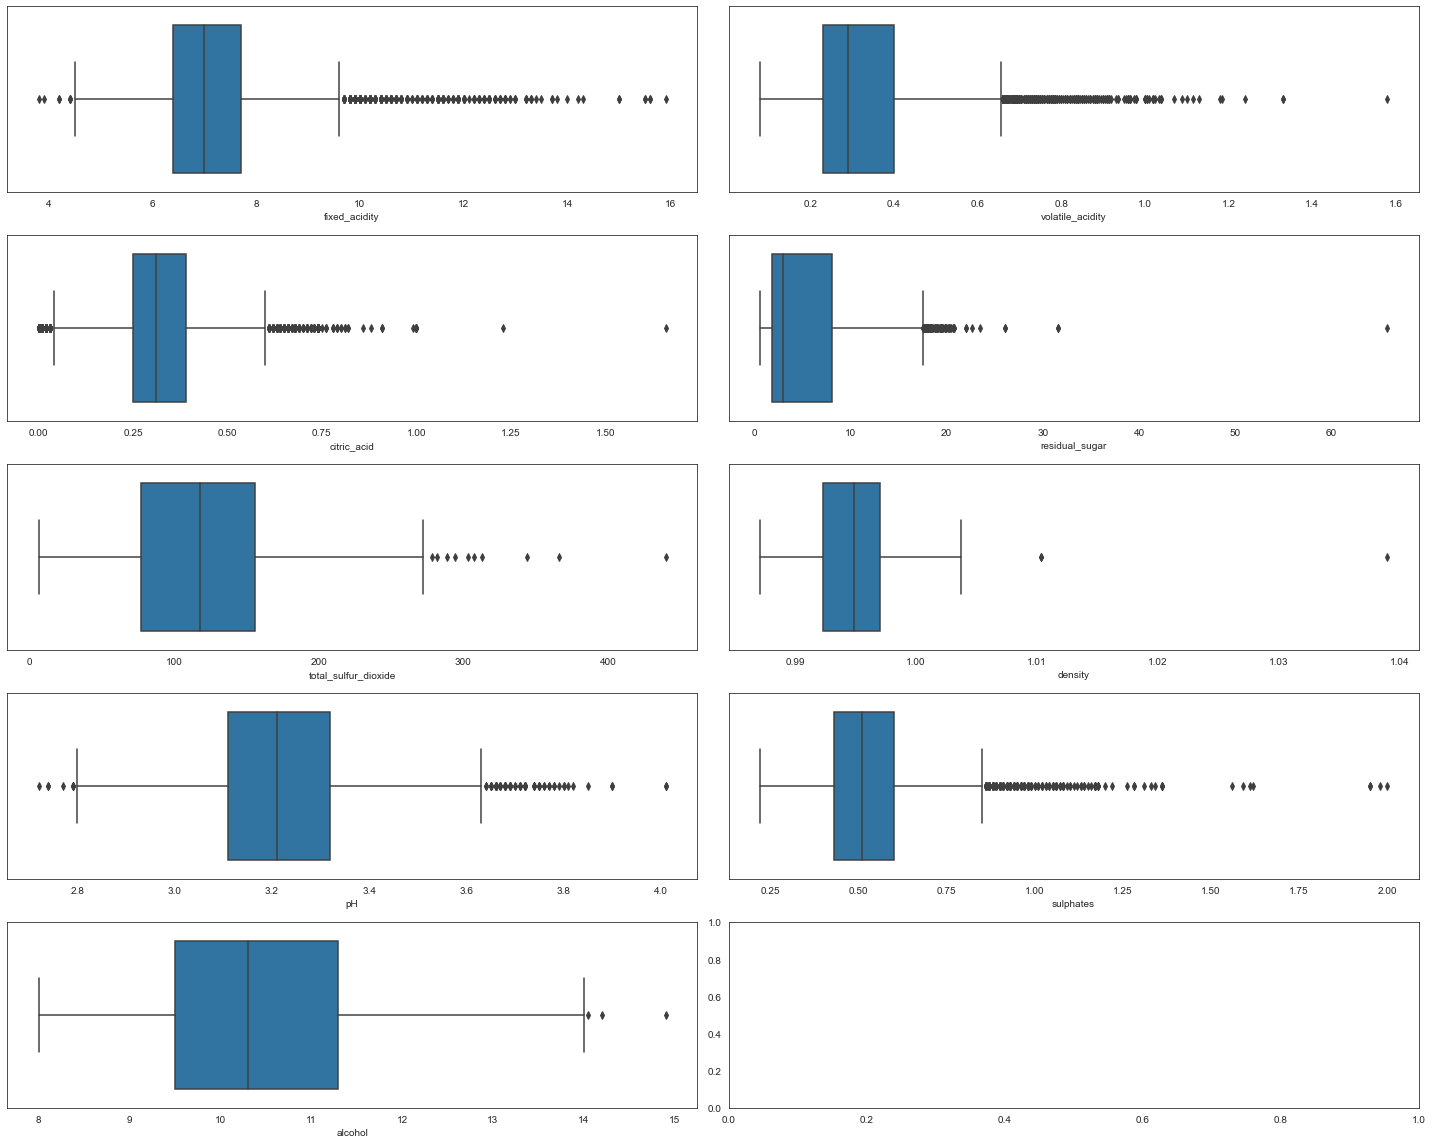

In [190]:
box_columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','total_sulfur_dioxide','density','pH','sulphates','alcohol']
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(20,16))
axes = [*axes.reshape(1,-1)][0]

for i,c in enumerate(df[box_columns].columns):
    sns.boxplot(data=df,x=c,ax=axes[i])
plt.tight_layout()

In [191]:
# type
df['type'].unique()

array(['white', 'red'], dtype=object)

In [192]:
print(df['type'].value_counts())

white    4898
red      1599
Name: type, dtype: int64


In [193]:
# index

# check duplication
print(df_train.shape[0] == df_train['index'].nunique())
print(df_test.shape[0] == df_test['index'].nunique())

True
True


In [194]:
# quality
df.loc[:,'quality'] = df['quality'].astype('category')
df['quality'].value_counts().sort_index()

3.0      26
4.0     186
5.0    1788
6.0    2416
7.0     924
8.0     152
9.0       5
Name: quality, dtype: int64

In [195]:
# volatile_acidity

df['volatile_acidity']

0       0.695
1       0.610
2       0.210
3       0.210
4       0.400
        ...  
6492    0.590
6493    0.150
6494    0.660
6495    0.420
6496    0.210
Name: volatile_acidity, Length: 6497, dtype: float64

In [196]:
od_encoder = OrdinalEncoder()
df.loc[:,'type'] = od_encoder.fit_transform(df['type'].to_numpy().reshape(-1,1))

In [197]:
df.loc[df['residual_sugar'] == df['residual_sugar'].max(),'residual_sugar'] = df['residual_sugar'].median()
df['residual_sugar'].sort_values(ascending=False)[:5]

4189    31.60
4068    31.60
3033    26.05
2440    26.05
3656    23.50
Name: residual_sugar, dtype: float64

In [198]:
df.loc[df['density'] == df['density'].max(),'density']# = df['density'].median()
df['density'].sort_values(ascending=False)[:5]

1220    1.03898
4189    1.01030
4068    1.01030
49      1.00369
3704    1.00369
Name: density, dtype: float64

In [199]:
df

,index,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,split
0,0,5.0,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1.0,train
1,1,5.0,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.0,train
2,2,5.0,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1.0,train
3,3,6.0,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1.0,train
4,4,6.0,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,NaN,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0.0,test
6493,996,NaN,8.7,0.150,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1.0,test
6494,997,NaN,8.8,0.660,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0.0,test
6495,998,NaN,7.0,0.420,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0.0,test


In [200]:
test = df[df['split'] == 'test'].drop(['quality','split'],axis=1)

x = df[df['split'] == 'train'].drop(['split','quality'],axis=1)
y = to_categorical(df[df['split'] == 'train'].loc[:,'quality'].astype(int) -3)

sc = MinMaxScaler()

X_scaled_train = sc.fit_transform(x)
X_scaled_test = sc.fit_transform(test)

print(X_scaled_train.shape)
print(X_scaled_test.shape)

(5497, 13)
(1000, 13)


In [201]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_train,y,random_state=42,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4397, 13)
(1100, 13)
(4397, 7)
(1100, 7)


In [202]:
# build model

model = Sequential()

model.add(Dense(128,activation='tanh',input_dim=X_scaled_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='tanh'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc','mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 12,359
Trainable params: 12,359
Non-trai

In [203]:
# training
early_stop = EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(X_train,y_train,batch_size=64,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 1.3294 - acc: 0.4369 - mae: 0.1962 - val_loss: 1.2103 - val_acc: 0.4855 - val_mae: 0.1853
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 1.1859 - acc: 0.4978 - mae: 0.1812 - val_loss: 1.1492 - val_acc: 0.5145 - val_mae: 0.1781
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 1.1396 - acc: 0.5169 - mae: 0.1745 - val_loss: 1.1223 - val_acc: 0.5273 - val_mae: 0.1692
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 1.1219 - acc: 0.5240 - mae: 0.1715 - val_loss: 1.1017 - val_acc: 0.5300 - val_mae: 0.1693
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 1.1119 - acc: 0.5240 - mae: 0.1706 - val_loss: 1.1059 - val_acc: 0.5200 - val_mae: 0.1713
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 1.1061 - acc: 0.5231 - mae: 0.1696 - val_loss: 1.1038 - val_acc: 0.5236 - val_mae: 0.1670
Epoch 7/200
69/69 [===

In [204]:
model.evaluate(X_test,y_test)

35/35 [==============================] - 0s 3ms/step - loss: 1.0411 - acc: 0.5482 - mae: 0.1627


[1.0411150455474854, 0.5481818318367004, 0.1627388745546341]

In [205]:
y_pred = model.predict(X_scaled_test)
y_pred

array([[7.1052406e-03, 5.4473057e-02, 5.6479967e-01, ..., 3.8878795e-02,
        1.0465327e-02, 2.4330655e-04],
       [2.4866920e-02, 6.7497201e-02, 7.5675404e-01, ..., 1.0354981e-02,
        8.7563798e-04, 2.4390312e-05],
       [3.1281465e-03, 1.5316383e-02, 6.0907370e-01, ..., 1.6134396e-02,
        1.8723371e-03, 2.4869500e-05],
       ...,
       [3.5664976e-02, 1.1519033e-01, 5.9120172e-01, ..., 7.5744572e-03,
        5.2872027e-04, 5.0202583e-05],
       [1.1100419e-03, 1.1489826e-02, 5.3139317e-01, ..., 2.6588757e-02,
        8.6820585e-04, 2.8754097e-05],
       [6.7355506e-02, 1.1515536e-02, 1.9879922e-01, ..., 1.3986272e-01,
        1.2036948e-01, 1.6541094e-02]], dtype=float32)

In [206]:
y_pred_labeled = (np.argmax(y_pred,axis=-1)+3).astype(int)
y_pred_labeled

array([5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 8, 5, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 7, 5, 5, 5, 6, 5, 8, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 7, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       6, 5, 7, 5, 7, 5, 6, 5, 6, 5, 7, 7, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 7, 6, 5, 7, 5, 7, 5, 5, 6, 7, 6, 5, 6, 7, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 6, 6, 7, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6,
       5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6,

<AxesSubplot:ylabel='Count'>

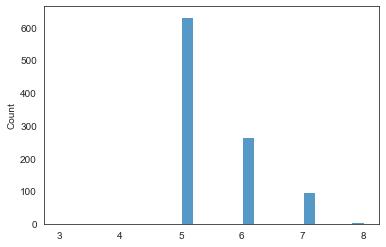

In [207]:
sns.histplot(x=y_pred_labeled)